In [6]:
import torch
import pandas as pd

### Data Distribution

In [7]:
train = pd.read_csv('Data/train_sampled_with_images.csv')
dev = pd.read_csv('Data/dev_sampled_with_images.csv')

In [8]:
# Data Distribution Analysis for 2-way, 3-way, and 6-way Classification
from sklearn.model_selection import train_test_split

def generate_classification_table(train_df, dev_df, classification_type='2_way'):
    """Generate data distribution table for a given classification type"""
    label_col = f'{classification_type}_label'
    
    # Split dev into val/test (80/20)
    val_df, test_df = train_test_split(
        dev_df, 
        test_size=0.2, 
        random_state=42, 
        stratify=dev_df[label_col]
    )
    
    # Get all unique labels
    all_labels = sorted(train_df[label_col].unique())
    
    # Create result dataframe
    results = []
    
    for label in all_labels:
        train_count = (train_df[label_col] == label).sum()
        train_pct = 100 * train_count / len(train_df)
        
        dev_count = (dev_df[label_col] == label).sum()
        dev_pct = 100 * dev_count / len(dev_df)
        
        val_count = (val_df[label_col] == label).sum()
        val_pct = 100 * val_count / len(val_df)
        
        test_count = (test_df[label_col] == label).sum()
        test_pct = 100 * test_count / len(test_df)
        
        results.append({
            'Label': label,
            'Train_n': train_count,
            'Train_%': f'{train_pct:.2f}%',
            'Dev_n': dev_count,
            'Dev_%': f'{dev_pct:.2f}%',
            'Val_n': val_count,
            'Val_%': f'{val_pct:.2f}%',
            'Test_n': test_count,
            'Test_%': f'{test_pct:.2f}%'
        })
    
    # Add total row
    results.append({
        'Label': 'Total',
        'Train_n': len(train_df),
        'Train_%': '100%',
        'Dev_n': len(dev_df),
        'Dev_%': '100%',
        'Val_n': len(val_df),
        'Val_%': '100%',
        'Test_n': len(test_df),
        'Test_%': '100%'
    })
    
    df = pd.DataFrame(results)
    return df

# Generate tables for all classification types
print("="*80)
print("2-WAY CLASSIFICATION")
print("="*80)
table_2way = generate_classification_table(train, dev, '2_way')
display(table_2way)

print("\n" + "="*80)
print("3-WAY CLASSIFICATION")
print("="*80)
table_3way = generate_classification_table(train, dev, '3_way')
display(table_3way)

print("\n" + "="*80)
print("6-WAY CLASSIFICATION")
print("="*80)
table_6way = generate_classification_table(train, dev, '6_way')
display(table_6way)

2-WAY CLASSIFICATION


,Label,Train_n,Train_%,Dev_n,Dev_%,Val_n,Val_%,Test_n,Test_%
0,0,6351,59.16%,1185,61.62%,948,61.64%,237,61.56%
1,1,4384,40.84%,738,38.38%,590,38.36%,148,38.44%
2,Total,10735,100%,1923,100%,1538,100%,385,100%



3-WAY CLASSIFICATION


,Label,Train_n,Train_%,Dev_n,Dev_%,Val_n,Val_%,Test_n,Test_%
0,0,4384,40.84%,738,38.38%,590,38.36%,148,38.44%
1,1,250,2.33%,47,2.44%,38,2.47%,9,2.34%
2,2,6101,56.83%,1138,59.18%,910,59.17%,228,59.22%
3,Total,10735,100%,1923,100%,1538,100%,385,100%



6-WAY CLASSIFICATION


,Label,Train_n,Train_%,Dev_n,Dev_%,Val_n,Val_%,Test_n,Test_%
0,0,4384,40.84%,738,38.38%,590,38.36%,148,38.44%
1,1,576,5.37%,125,6.50%,100,6.50%,25,6.49%
2,2,1907,17.76%,366,19.03%,293,19.05%,73,18.96%
3,3,185,1.72%,42,2.18%,34,2.21%,8,2.08%
4,4,3259,30.36%,580,30.16%,464,30.17%,116,30.13%
5,5,424,3.95%,72,3.74%,57,3.71%,15,3.90%
6,Total,10735,100%,1923,100%,1538,100%,385,100%


### Accuracy & Precision

In [9]:
Blip = {
   "2-way":{
        "accuracy": 0.8285714285714286,
        "precision": 0.8272973403408186,
        "recall": 0.8285714285714286,
        "f1": 0.8273453818908365,
        "roc_auc": 0.9095820504048352,
        "average_confidence": 0.9762094616889954,
        "average_e ntropy": 0.05725689232349396
        },
    "3-way": {
        "accuracy": 0.8181818181818182,
        "precision": 0.8198716257387435,
        "recall": 0.8181818181818182,
        "f1": 0.8145570406280566,
        "roc_auc": 0.9419905671857999,
        "average_confidence": 0.9734124541282654,
        "average_entropy": 0.06371859461069107  
    },
    "6-way":{
        "accuracy": 0.7558441558441559,
        "precision": 0.7459605218183889,
        "recall": 0.7558441558441559,
        "f1": 0.7467647216491538,
        "roc_auc": 0.9318020438311136,
        "average_confidence": 0.9335366487503052,
        "average_entropy": 0.16754935681819916
        }
}

Base = {
    "2-way":{
  "accuracy": 0.8389610389610389,
  "precision": 0.8489848179989026,
  "recall": 0.8389610389610389,
  "f1": 0.8407056277056277,
  "per_class": {
    "Real": {
      "precision": 0.9107981220657277,
      "recall": 0.8185654008438819,
      "f1": 0.8622222222222222
    },
    "Fake": {
      "precision": 0.75,
      "recall": 0.8716216216216216,
      "f1": 0.80625
    }
  },
  "roc_auc": 0.9147565286805793,
  "average_confidence": 0.8262709379196167,
  "average_entropy": 0.38651254773139954
},
    "3-way":{
  "accuracy": 0.8337662337662337,
  "precision": 0.834241266586182,
  "recall": 0.8337662337662337,
  "f1": 0.8326230830444444,
  "per_class": {
    "Fake": {
      "precision": 0.8115942028985508,
      "recall": 0.7567567567567568,
      "f1": 0.7832167832167832
    },
    "Satire": {
      "precision": 1.0,
      "recall": 0.7272727272727273,
      "f1": 0.8421052631578947
    },
    "Real": {
      "precision": 0.8410041841004184,
      "recall": 0.8893805309734514,
      "f1": 0.864516129032258
    }
  },
  "roc_auc": 0.9369650990664858,
  "average_confidence": 0.8235069513320923,
  "average_entropy": 0.38905882835388184
},
    "6-way":{
  "accuracy": 0.7324675324675325,
  "precision": 0.7261414664782542,
  "recall": 0.7324675324675325,
  "f1": 0.7018007279182161,
  "per_class": {
    "Fake": {
      "precision": 0.6839378238341969,
      "recall": 0.8918918918918919,
      "f1": 0.7741935483870968
    },
    "Satire/Parody": {
      "precision": 0.8333333333333334,
      "recall": 0.15151515151515152,
      "f1": 0.2564102564102564
    },
    "Misleading": {
      "precision": 0.7,
      "recall": 0.546875,
      "f1": 0.6140350877192983
    },
    "Imposter": {
      "precision": 0.0,
      "recall": 0.0,
      "f1": 0.0
    },
    "False Connection": {
      "precision": 0.8333333333333334,
      "recall": 0.8849557522123894,
      "f1": 0.8583690987124464
    },
    "Manipulated": {
      "precision": 0.625,
      "recall": 0.5263157894736842,
      "f1": 0.5714285714285714
    }
  },
  "roc_auc": 0.9046972018819841,
  "average_confidence": 0.7778070569038391,
  "average_entropy": 0.6147648692131042
}
}

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("husl")

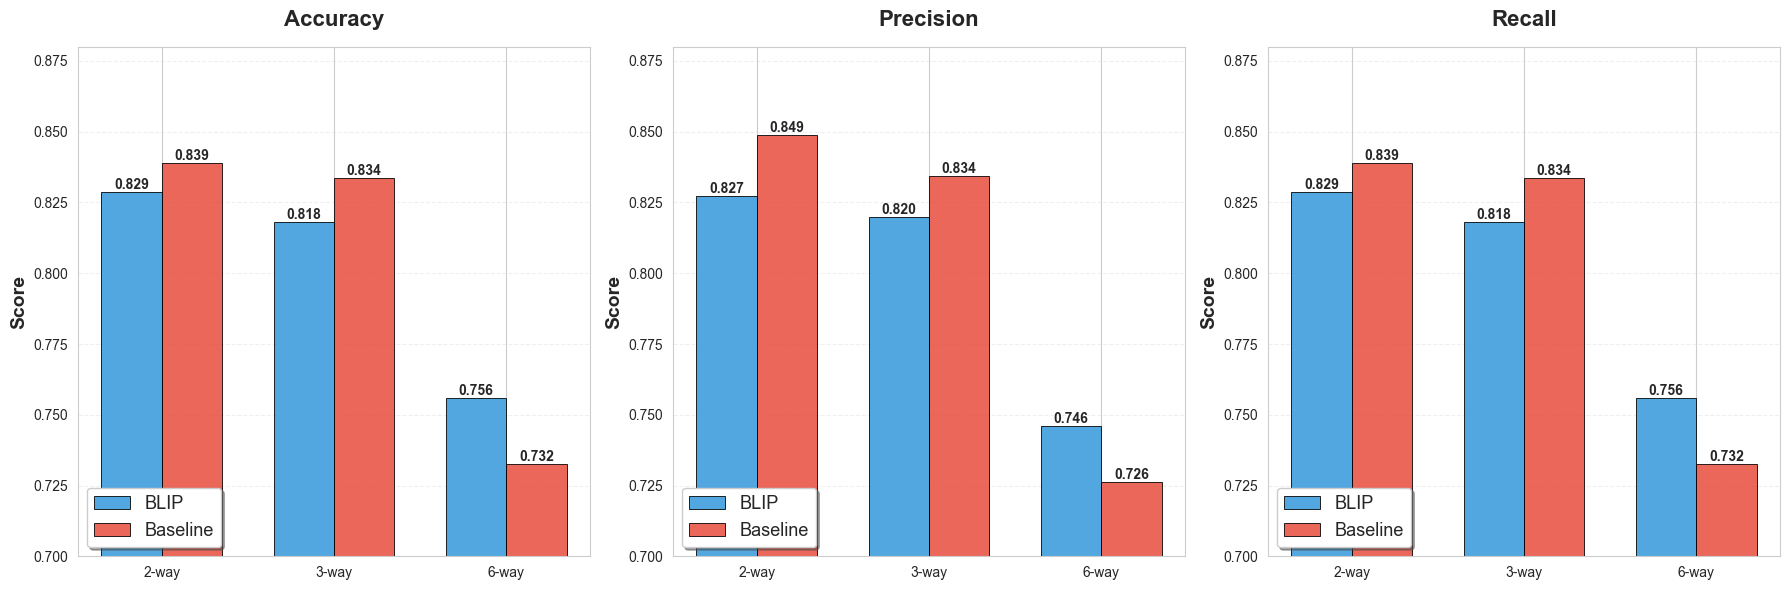

In [20]:
data_list = []
for task in ['2-way', '3-way', '6-way']:
    for metric in ['accuracy', 'precision', 'recall']:
        data_list.append({
            'Task': task,
            'Metric': metric,
            'BLIP': Blip[task][metric],
            'Baseline': Base[task][metric]
        })

df = pd.DataFrame(data_list)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 定义metrics和标题
metrics = ['accuracy', 'precision', 'recall']
metric_titles = ['Accuracy', 'Precision', 'Recall']

# 为每个metric创建grouped bar chart
for idx, (metric, title) in enumerate(zip(metrics, metric_titles)):
    ax = axes[idx]
    
    # 筛选当前metric的数据
    metric_df = df[df['Metric'] == metric]
    
    # 设置bar的位置
    x = np.arange(len(metric_df))
    width = 0.35
    
    # 绘制bars
    bars1 = ax.bar(x - width/2, metric_df['BLIP'], width, label='BLIP', 
                   color='#3498db', alpha=0.85, edgecolor='black', linewidth=0.7)
    bars2 = ax.bar(x + width/2, metric_df['Baseline'], width, label='Baseline', 
                   color='#e74c3c', alpha=0.85, edgecolor='black', linewidth=0.7)
    
    # 添加数值标签
    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    for bar in bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # 设置标签和标题
    ax.set_ylabel('Score', fontsize=14, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold', pad=15)
    ax.set_xticks(x)
    ax.set_xticklabels(['2-way', '3-way', '6-way'], fontsize=13)
    ax.legend(loc='lower left', frameon=True, shadow=True, fontsize=13)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # 设置y轴范围
    ax.set_ylim([0.70, 0.88])
    
    # 美化刻度
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig('model_comparison_3metrics.png', dpi=300, bbox_inches='tight')
plt.show()

## Confusion Matrix for 6-way

In [44]:
Base = {
  "confusion_matrix": [
    [
      132,
      0,
      8,
      0,
      7,
      1
    ],
    [
      15,
      5,
      3,
      0,
      9,
      1
    ],
    [
      23,
      0,
      35,
      0,
      3,
      3
    ],
    [
      5,
      1,
      1,
      0,
      0,
      1
    ],
    [
      10,
      0,
      3,
      0,
      100,
      0
    ],
    [
      8,
      0,
      0,
      0,
      1,
      10
    ]
  ],
  "class_names": [
    "Fake",
    "Satire/Parody",
    "Misleading",
    "Imposter",
    "False Connection",
    "Manipulated"
  ]
}

BLIP = {
  "confusion_matrix": [
    [
      122,
      3,
      13,
      0,
      9,
      1
    ],
    [
      8,
      11,
      0,
      0,
      3,
      3
    ],
    [
      13,
      1,
      42,
      1,
      15,
      1
    ],
    [
      2,
      0,
      4,
      1,
      1,
      0
    ],
    [
      4,
      1,
      7,
      0,
      103,
      1
    ],
    [
      1,
      0,
      1,
      1,
      0,
      12
    ]
  ],
  "class_names": [
    "Real",
    "Satire/Parody",
    "Misleading",
    "Imposter",
    "False Connection",
    "Manipulated"
  ]
}

Base_2 = {
  "confusion_matrix": [
    [
      194,
      43
    ],
    [
      19,
      129
    ]
  ],
  "class_names": [
    "Real",
    "Fake"
  ]
}

BLIP_2 = {
  "confusion_matrix": [
    [
      209,
      28
    ],
    [
      38,
      110
    ]
  ],
  "class_names": [
    "Real",
    "Fake"
  ]
}

Base_3 = {
  "confusion_matrix": [
    [
      112,
      0,
      36
    ],
    [
      1,
      8,
      2
    ],
    [
      25,
      0,
      201
    ]
  ],
  "class_names": [
    "Fake (False Text)",
    "Fake (True Text)",
    "Real"
  ]
}

BLIP_3 = {
  "confusion_matrix": [
    [
      101,
      0,
      47
    ],
    [
      0,
      8,
      1
    ],
    [
      20,
      2,
      206
    ]
  ],
  "class_names": [
    "Real",
    "Fake (True Text)",
    "Fake (False Text)"
  ]
}


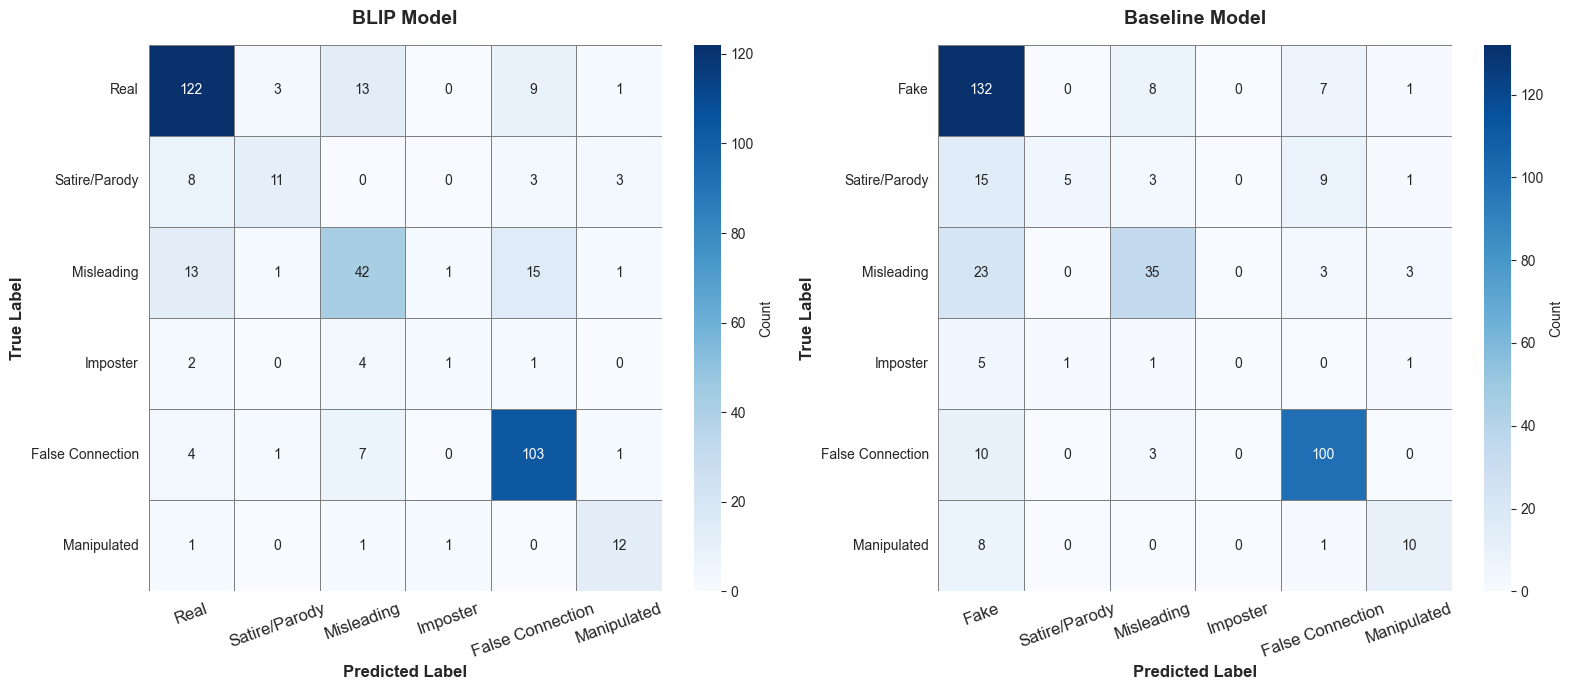

In [29]:
cm_blip = np.array(BLIP["confusion_matrix"])
cm_base = np.array(Base["confusion_matrix"])

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

cmap = 'Blues'

# BLIP confusion matrix
sns.heatmap(cm_blip, annot=True, fmt='d', cmap=cmap, 
            xticklabels=BLIP["class_names"],
            yticklabels=BLIP["class_names"],
            cbar_kws={'label': 'Count'},
            ax=axes[0],
            linewidths=0.5,
            linecolor='gray')
axes[0].set_title('BLIP Model', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=20, labelsize=12)
axes[0].tick_params(axis='y', rotation=0, labelsize=10)

# Baseline confusion matrix 
sns.heatmap(cm_base, annot=True, fmt='d', cmap=cmap,
            xticklabels=Base["class_names"],
            yticklabels=Base["class_names"],
            cbar_kws={'label': 'Count'},
            ax=axes[1],
            linewidths=0.5,
            linecolor='gray')
axes[1].set_title('Baseline Model', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=20, labelsize=12)
axes[1].tick_params(axis='y', rotation=0, labelsize=10)

plt.tight_layout()
plt.savefig('confusion_matrix_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

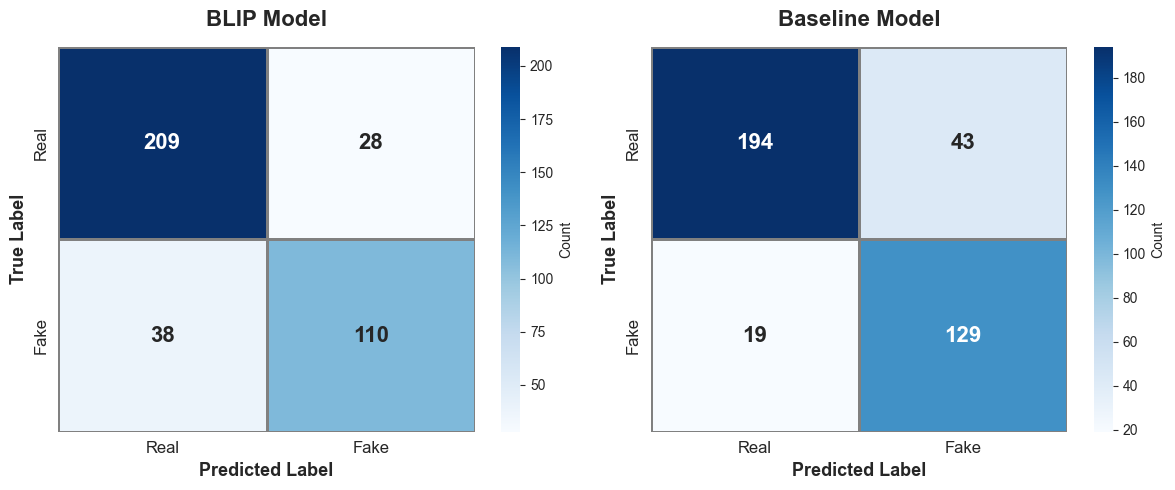

In [35]:
cm_blip = np.array(BLIP_2["confusion_matrix"])
cm_base = np.array(Base_2["confusion_matrix"])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
cmap = 'Blues'

# BLIP confusion matrix 
sns.heatmap(cm_blip, annot=True, fmt='d', cmap=cmap, 
            xticklabels=BLIP_2["class_names"],
            yticklabels=BLIP_2["class_names"],
            cbar_kws={'label': 'Count'},
            ax=axes[0],
            linewidths=1,
            linecolor='gray',
            annot_kws={'size': 16, 'weight': 'bold'})
axes[0].set_title('BLIP Model', fontsize=16, fontweight='bold', pad=15)
axes[0].set_xlabel('Predicted Label', fontsize=13, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=13, fontweight='bold')
axes[0].tick_params(axis='both', labelsize=12)

# Baseline confusion matrix
sns.heatmap(cm_base, annot=True, fmt='d', cmap=cmap,
            xticklabels=Base_2["class_names"],
            yticklabels=Base_2["class_names"],
            cbar_kws={'label': 'Count'},
            ax=axes[1],
            linewidths=1,
            linecolor='gray',
            annot_kws={'size': 16, 'weight': 'bold'})
axes[1].set_title('Baseline Model', fontsize=16, fontweight='bold', pad=15)
axes[1].set_xlabel('Predicted Label', fontsize=13, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=13, fontweight='bold')
axes[1].tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.savefig('confusion_matrix_2way_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

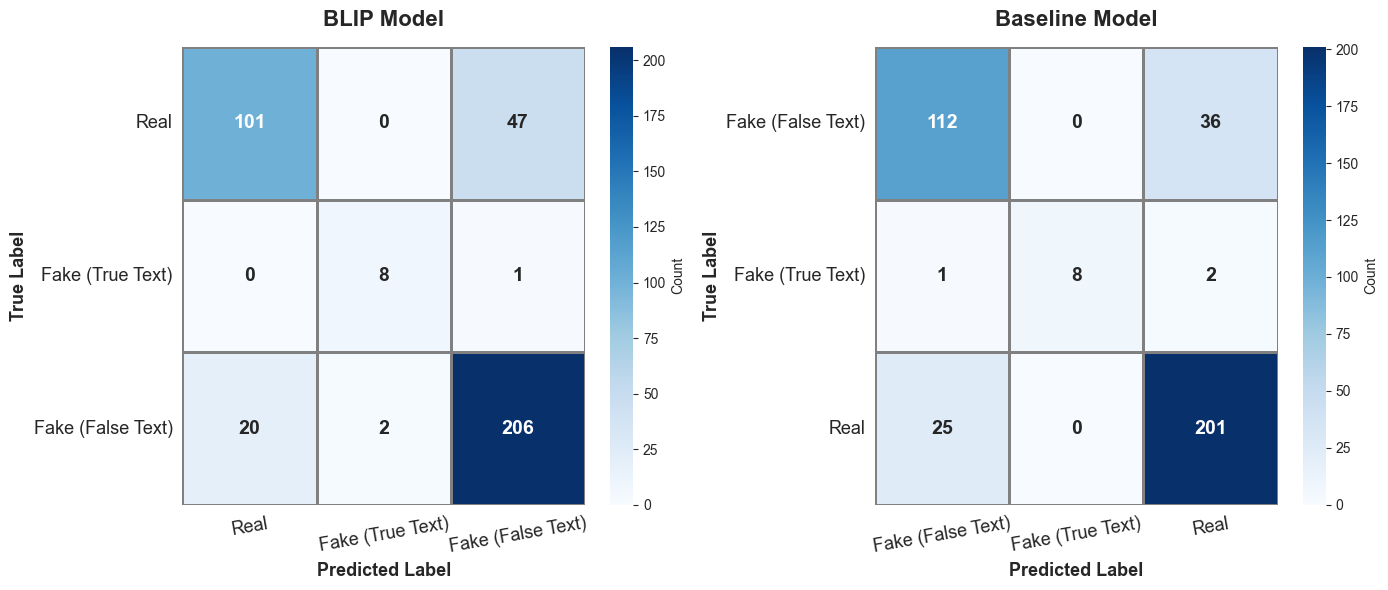

In [46]:
cm_blip = np.array(BLIP_3["confusion_matrix"])
cm_base = np.array(Base_3["confusion_matrix"])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
cmap = 'Blues'

# BLIP confusion matrix 
sns.heatmap(cm_blip, annot=True, fmt='d', cmap=cmap, 
            xticklabels=BLIP_3["class_names"],
            yticklabels=BLIP_3["class_names"],
            cbar_kws={'label': 'Count'},
            ax=axes[0],
            linewidths=1,
            linecolor='gray',
            annot_kws={'size': 14, 'weight': 'bold'})
axes[0].set_title('BLIP Model', fontsize=16, fontweight='bold', pad=15)
axes[0].set_xlabel('Predicted Label', fontsize=13, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=13, fontweight='bold')
axes[0].tick_params(axis='x', rotation=10, labelsize=13)
axes[0].tick_params(axis='y', rotation=0, labelsize=13)

# Baseline confusion matrix 
sns.heatmap(cm_base, annot=True, fmt='d', cmap=cmap,
            xticklabels=Base_3["class_names"],
            yticklabels=Base_3["class_names"],
            cbar_kws={'label': 'Count'},
            ax=axes[1],
            linewidths=1,
            linecolor='gray',
            annot_kws={'size': 14, 'weight': 'bold'})
axes[1].set_title('Baseline Model', fontsize=16, fontweight='bold', pad=15)
axes[1].set_xlabel('Predicted Label', fontsize=13, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=13, fontweight='bold')
axes[1].tick_params(axis='x', rotation=10, labelsize=13)
axes[1].tick_params(axis='y', rotation=0, labelsize=13)

plt.tight_layout()
plt.savefig('confusion_matrix_3way_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Validation accuracy

In [48]:
blip_2way_val_acc = [78.09, 80.75, 82.83, 83.94, 83.81, 85.11, 83.49, 84.79, 84.01]
blip_3way_val_acc = [74.77, 77.76, 81.53, 81.08, 81.73, 82.25, 82.83, 82.70, 82.90, 83.94]
blip_6way_val_acc = [69.90, 75.55, 75.03, 76.40, 76.53, 76.59, 77.05, 77.31, 77.37, 76.59]

# Baseline_v2 Validation Accuracies
baseline_2way_val_acc = [78.74, 80.43, 82.12, 82.77, 83.29, 83.62, 81.73, 82.51, 81.92, 84.33]
baseline_3way_val_acc = [75.03, 78.22, 79.19, 80.95, 81.79, 81.27, 82.31, 82.90, 82.44, 83.22]
baseline_6way_val_acc = [61.90, 67.43, 70.03, 71.00, 71.39, 71.07, 72.37, 72.50, 73.34, 73.60]

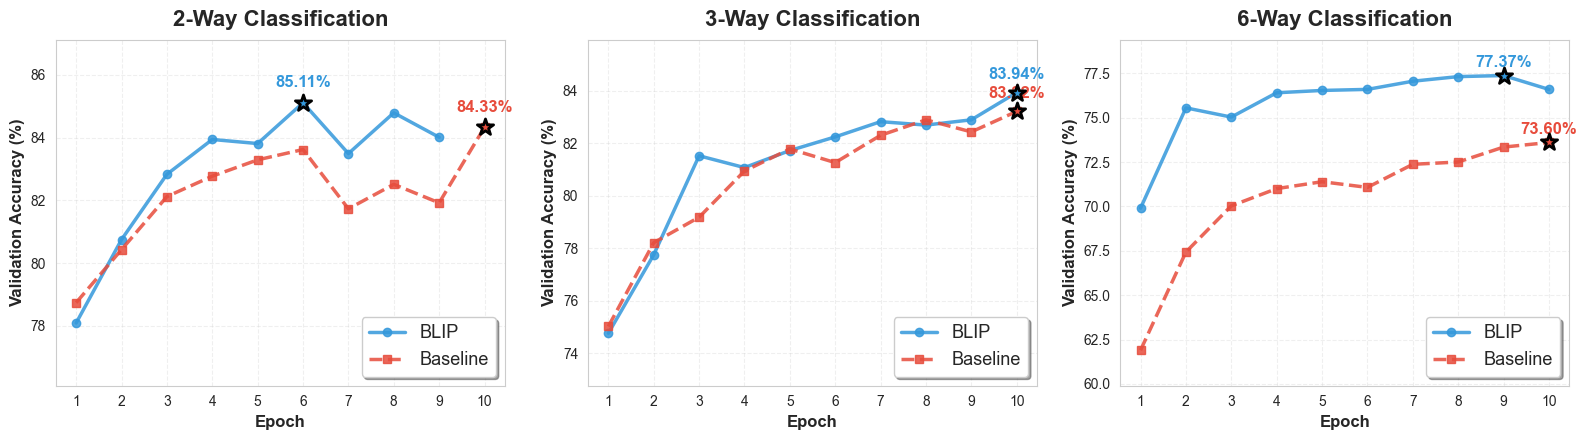

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4.5), sharey=False)

tasks = [
    ('2-Way Classification', blip_2way_val_acc, baseline_2way_val_acc),
    ('3-Way Classification', blip_3way_val_acc, baseline_3way_val_acc),
    ('6-Way Classification', blip_6way_val_acc, baseline_6way_val_acc)
]

for idx, (title, blip_acc, base_acc) in enumerate(tasks):
    ax = axes[idx]
    
    epochs_blip = range(1, len(blip_acc) + 1)
    epochs_base = range(1, len(base_acc) + 1)
    
    ax.plot(epochs_blip, blip_acc, marker='o', markersize=6, 
            linewidth=2.5, label='BLIP', color='#3498db', alpha=0.85)
    ax.plot(epochs_base, base_acc, marker='s', markersize=6, 
            linewidth=2.5, label='Baseline', color='#e74c3c', alpha=0.85, linestyle='--')
    
    max_blip = max(blip_acc)
    max_base = max(base_acc)
    max_blip_epoch = blip_acc.index(max_blip) + 1
    max_base_epoch = base_acc.index(max_base) + 1
    
    ax.scatter([max_blip_epoch], [max_blip], s=150, color='#3498db', 
               edgecolors='black', linewidths=2, zorder=5, marker='*')
    ax.scatter([max_base_epoch], [max_base], s=150, color='#e74c3c', 
               edgecolors='black', linewidths=2, zorder=5, marker='*')
    
    ax.text(max_blip_epoch, max_blip + 0.5, f'{max_blip:.2f}%', 
            ha='center', fontsize=12, fontweight='bold', color='#3498db')
    ax.text(max_base_epoch, max_base + 0.5, f'{max_base:.2f}%', 
            ha='center', fontsize=12, fontweight='bold', color='#e74c3c')
    
    ax.set_xlabel('Epoch', fontsize=12, fontweight='bold')
    ax.set_ylabel('Validation Accuracy (%)', fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold', pad=10)
    ax.legend(loc='lower right', frameon=True, shadow=True, fontsize=13)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    ax.set_xticks(range(1, max(len(blip_acc), len(base_acc)) + 1))
    
    min_val = min(min(blip_acc), min(base_acc)) - 2
    max_val = max(max(blip_acc), max(base_acc)) + 2
    ax.set_ylim([min_val, max_val])

plt.subplots_adjust(wspace=0.1)
plt.tight_layout()
plt.savefig('training_validation_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()